In [1]:
import pandas as pd
import numpy as np

In [17]:
##2.Load the dataset


In [16]:
data=pd.read_csv("C:/Users/deebi/Untitled Folder/Churn_Modelling.csv")
df=pd.DataFrame(data)
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [18]:
df['HasCrCard'] = df['HasCrCard'].astype('category')
df['IsActiveMember'] = df['IsActiveMember'].astype('category')
df['Exited'] = df['Exited'].astype('category')
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

  HasCrCard IsActiveMember  EstimatedSalary Exited  
0         1              1        101348.88      1  
1         0              1        112542.58      0  
2         1              0        113931.57      1  
3         0              0         93826.63      0  
4         1              1         79084.10      0

In [19]:
##3.Perform Below Visualizations


index  Exited
0     0  0.7963
1     1  0.2037

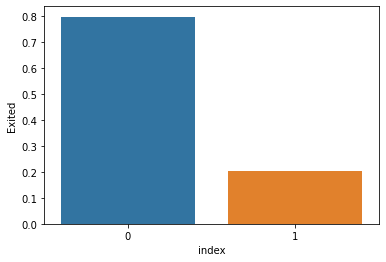

In [20]:
#● Univariate Analysis

import seaborn as sns
density = df['Exited'].value_counts(normalize=True).reset_index()
sns.barplot(data=density, x='index', y='Exited', );
density

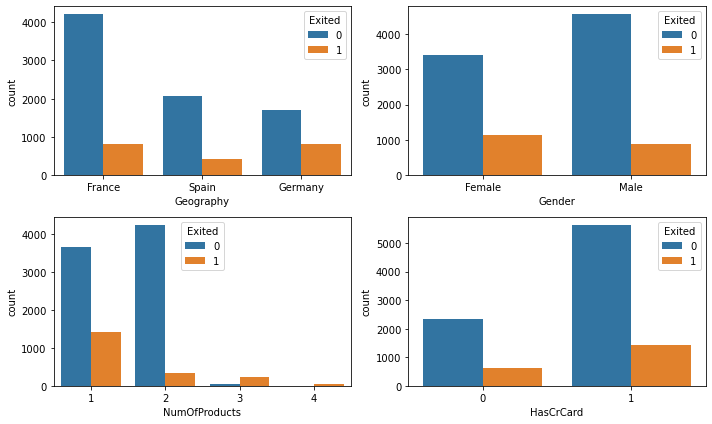

In [22]:
# ● Bi - Variate Analysis
import matplotlib.pyplot as plt
import numpy as np
categorical = df.drop(columns=['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'])
rows = int(np.ceil(categorical.shape[1] / 2)) - 1

# create sub-plots anf title them
fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(10,6))
axes = axes.flatten()

for row in range(rows):
    cols = min(2, categorical.shape[1] - row*2)
    for col in range(cols):
        col_name = categorical.columns[2 * row + col]
        ax = axes[row*2 + col]       

        sns.countplot(data=categorical, x=col_name, hue="Exited", ax=ax);
        
plt.tight_layout()

<AxesSubplot:>

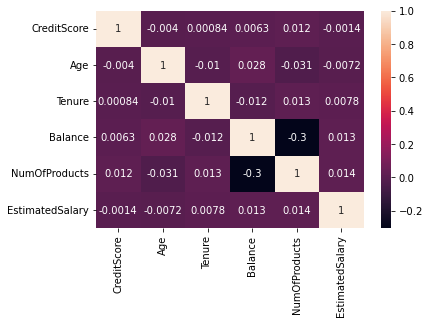

In [23]:
# ● Multi - Variate Analysis
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
sb.heatmap(df.corr(),annot=True)


In [24]:
data.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts  EstimatedSalary  
count   10000.000000   10000.000000     10000.000000  
mean    76485.889288       1.530200    100090.239881  
std     62397.405202       0.581654     57510.492818  
min         0.000000       1.000000        11.580000  
25%         0.000000       1.000000     51002.110000  
50%     97198.540000       1.000000    100193.915000  
75%    127644.240000       2.000000    149388.247500  
max    250898.090000       4.000000    199992.480000

In [25]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [26]:
for i in df:
    if df[i].dtype=='object' or df[i].dtype=='category':
        print("unique of "+i+" is "+str(len(set(df[i])))+" they are "+str(set(df[i])))


unique of Geography is 3 they are {'France', 'Germany', 'Spain'}
unique of Gender is 2 they are {'Female', 'Male'}
unique of HasCrCard is 2 they are {0, 1}
unique of IsActiveMember is 2 they are {0, 1}
unique of Exited is 2 they are {0, 1}


# of Bivariate Outliers: 19


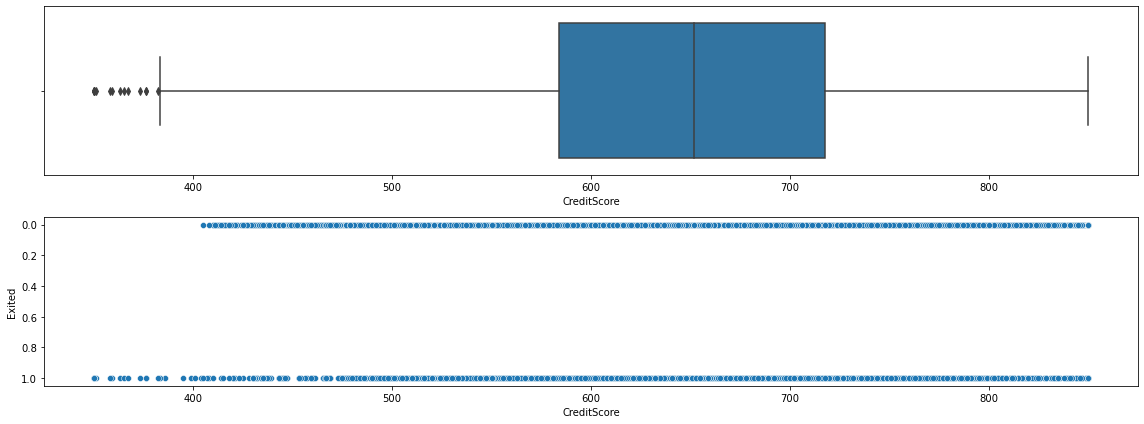

In [27]:
#find and replace outliers
def box_scatter(data, x, y):    
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(16,6))
    sns.boxplot(data=data, x=x, ax=ax1)
    sns.scatterplot(data=data, x=x,y=y,ax=ax2)
box_scatter(df,'CreditScore','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['CreditScore'] < 400])}")

# of Bivariate Outliers: 3


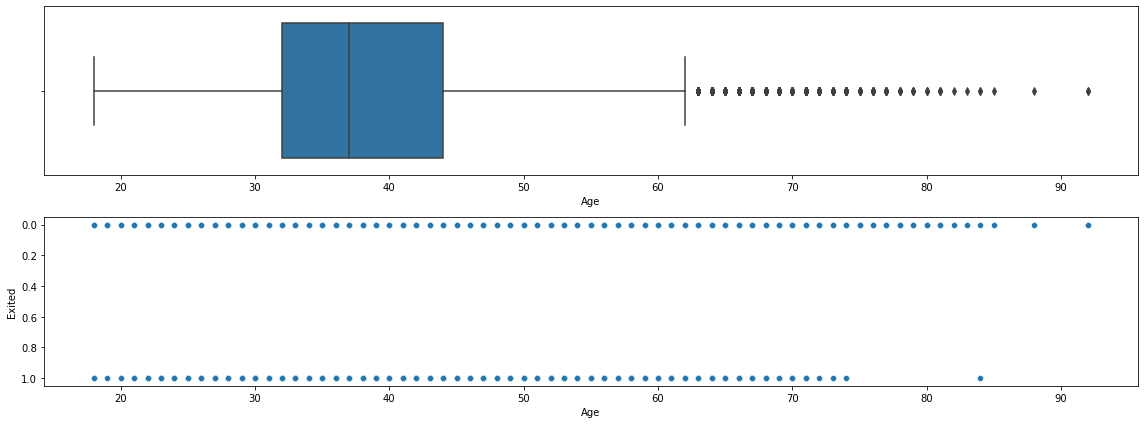

In [28]:
box_scatter(df,'Age','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['Age'] > 87])}")

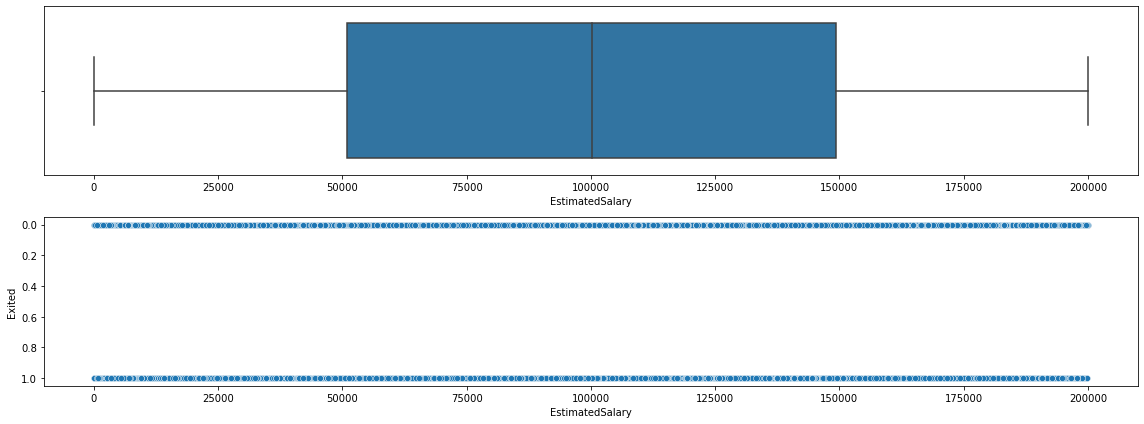

In [29]:
box_scatter(df,'EstimatedSalary','Exited');
plt.tight_layout()

In [30]:
for i in df:
    if df[i].dtype=='int64' or df[i].dtypes=='float64':
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        iqr=q3-q1
        upper=q3+1.5*iqr
        lower=q1-1.5*iqr
        df[i]=np.where(df[i] >upper, upper, df[i])
        df[i]=np.where(df[i] <lower, lower, df[i])

# of Bivariate Outliers: 19


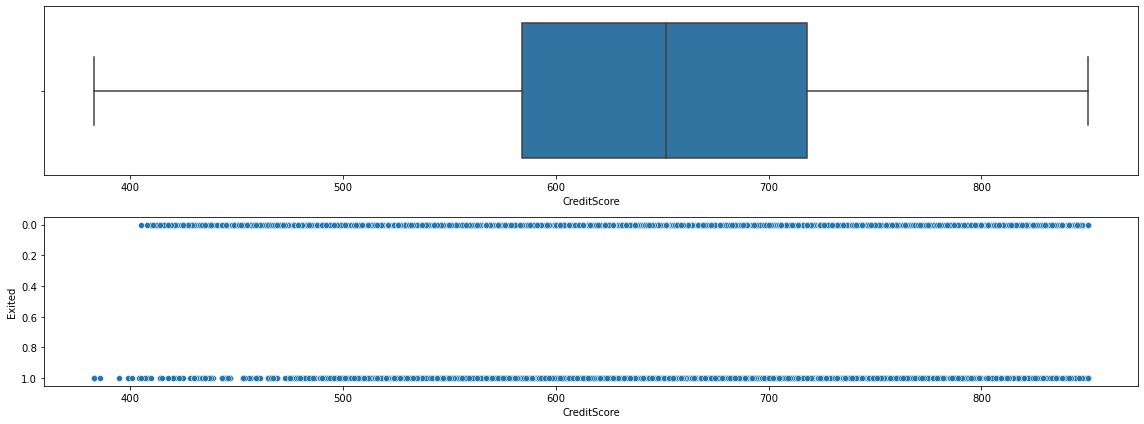

In [32]:
#removing outliers

box_scatter(df,'CreditScore','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['CreditScore'] < 400])}")

# of Bivariate Outliers: 0


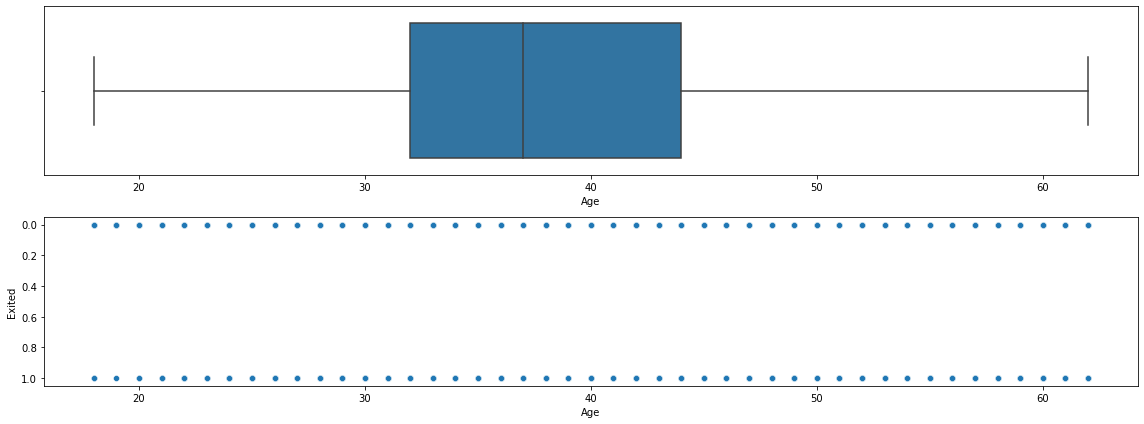

In [33]:
box_scatter(df,'Age','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['Age'] > 87])}")

# of Bivariate Outliers: 4


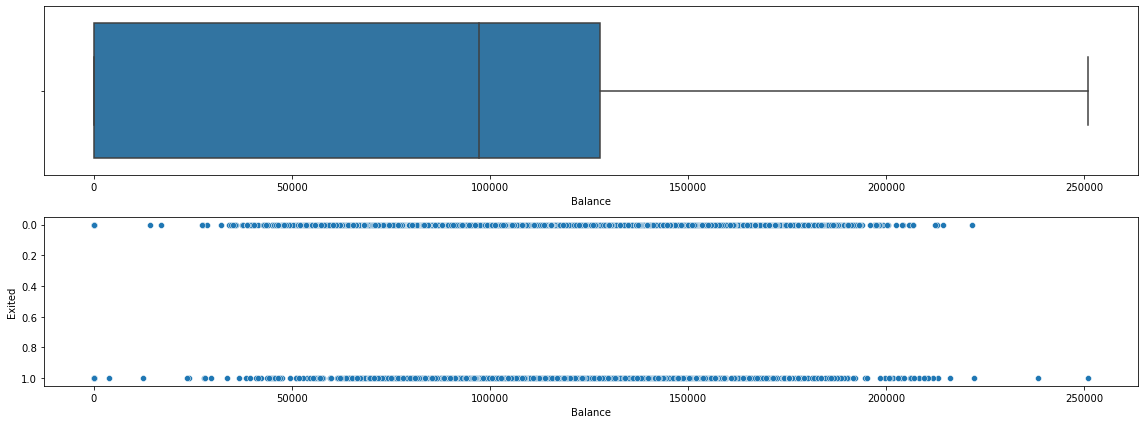

In [34]:
box_scatter(df,'Balance','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['Balance'] > 220000])}")

In [37]:
#. Check for Categorical columns and perform encoding.
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in df:
    if df[i].dtype=='object' or df[i].dtype=='category':
        df[i]=encoder.fit_transform(df[i])

In [38]:
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts HasCrCard IsActiveMember  EstimatedSalary  \
0       2       0.00              1         1              1        101348.88   
1       1   83807.86              1         0              1        112542.58   
2       8  159660.80              3         1              0        113931.57   
3       1       0.00              2         0              0         93826.63   
4       2  125510.82              1         1              1         79084.10   

  Exited  
0      1  
1      0  
2      1  
3      0  
4      0

In [40]:

print(data.Geography.unique())
print(data.Tenure.unique())
print(data.Surname.unique())
print(data.Gender.unique())

['France' 'Spain' 'Germany']
[ 2  1  8  7  4  6  3 10  5  9  0]
['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
['Female' 'Male']


In [43]:
##spli data into dependent and independent variables
y = df["EstimatedSalary"]
x= df.drop("EstimatedSalary",axis=1)


In [42]:
y

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64

In [44]:
x


CreditScore  Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0           619.0          0       0  42.0     2.0       0.00            1.0   
1           608.0          2       0  41.0     1.0   83807.86            1.0   
2           502.0          0       0  42.0     8.0  159660.80            3.0   
3           699.0          0       0  39.0     1.0       0.00            2.0   
4           850.0          2       0  43.0     2.0  125510.82            1.0   
...           ...        ...     ...   ...     ...        ...            ...   
9995        771.0          0       1  39.0     5.0       0.00            2.0   
9996        516.0          0       1  35.0    10.0   57369.61            1.0   
9997        709.0          0       0  36.0     7.0       0.00            1.0   
9998        772.0          1       1  42.0     3.0   75075.31            2.0   
9999        792.0          0       0  28.0     4.0  130142.79            1.0   

      HasCrCard  IsActiveMember  Exited  
0             1               1       1  
1             0               1       0  
2             1               0       1  
3             0               0       0  
4             1               1       0  
...         ...             ...     ...  
9995          1               0       0  
9996          1               1       0  
9997          0               1       1  
9998          1               0       1  
9999          1               0       0  

[10000 rows x 10 columns]

In [45]:
##Scale the independent values
scaled_X = pd.DataFrame(scale(X),columns=X.columns)
scaled_X

CreditScore  Geography    Gender       Age    Tenure   Balance  \
0       -0.326878  -0.901886 -1.095988  0.342615 -1.041760 -1.225848   
1       -0.440804   1.515067 -1.095988  0.240011 -1.387538  0.117350   
2       -1.538636  -0.901886 -1.095988  0.342615  1.032908  1.333053   
3        0.501675  -0.901886 -1.095988  0.034803 -1.387538 -1.225848   
4        2.065569   1.515067 -1.095988  0.445219 -1.041760  0.785728   
...           ...        ...       ...       ...       ...       ...   
9995     1.247373  -0.901886  0.912419  0.034803 -0.004426 -1.225848   
9996    -1.393640  -0.901886  0.912419 -0.375612  1.724464 -0.306379   
9997     0.605244  -0.901886 -1.095988 -0.273008  0.687130 -1.225848   
9998     1.257730   0.306591  0.912419  0.342615 -0.695982 -0.022608   
9999     1.464868  -0.901886 -1.095988 -1.093840 -0.350204  0.859965   

      NumOfProducts  HasCrCard  IsActiveMember    Exited  
0         -0.924827   0.646092        0.970243  1.977165  
1         -0.924827  -1.547768        0.970243 -0.505775  
2          2.583620   0.646092       -1.030670  1.977165  
3          0.829397  -1.547768       -1.030670 -0.505775  
4         -0.924827   0.646092        0.970243 -0.505775  
...             ...        ...             ...       ...  
9995       0.829397   0.646092       -1.030670 -0.505775  
9996      -0.924827   0.646092        0.970243 -0.505775  
9997      -0.924827  -1.547768        0.970243  1.977165  
9998       0.829397   0.646092       -1.030670  1.977165  
9999      -0.924827   0.646092       -1.030670 -0.505775  

[10000 rows x 10 columns]

In [46]:
#Split the data into training and testing
Xtrain, Xtest, ytrain, ytest = train_test_split(scaled_X, y, test_size=0.3, random_state=0)
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)
Xtrain

(7000, 10) (3000, 10) (7000,) (3000,)


CreditScore  Geography    Gender       Age    Tenure   Balance  \
7681    -0.099026  -0.901886  0.912419 -0.580820 -1.041760  1.117213   
9031    -1.134717  -0.901886  0.912419  0.034803  0.687130 -1.225848   
3691    -0.627228  -0.901886 -1.095988  2.394693 -0.004426  1.354191   
202     -1.393640   1.515067  0.912419  1.163446 -0.004426 -1.225848   
5625    -1.476495  -0.901886 -1.095988  2.189485  0.687130  1.070229   
...           ...        ...       ...       ...       ...       ...   
9225    -0.585800   0.306591 -1.095988 -0.683424 -0.350204  0.698607   
4859     1.485582   1.515067 -1.095988 -1.709463 -0.350204  0.608299   
3264     0.905595  -0.901886  0.912419 -0.375612 -0.004426  1.358909   
9845    -0.627228   1.515067 -1.095988 -0.067801  1.378686 -1.225848   
2732    -0.285450   0.306591 -1.095988  0.958238 -1.387538  0.506303   

      NumOfProducts  HasCrCard  IsActiveMember    Exited  
7681       0.829397   0.646092        0.970243  1.977165  
9031       0.829397   0.646092       -1.030670 -0.505775  
3691      -0.924827  -1.547768        0.970243 -0.505775  
202       -0.924827  -1.547768        0.970243  1.977165  
5625      -0.924827   0.646092        0.970243 -0.505775  
...             ...        ...             ...       ...  
9225       0.829397   0.646092        0.970243 -0.505775  
4859      -0.924827   0.646092        0.970243 -0.505775  
3264       0.829397   0.646092       -1.030670 -0.505775  
9845       0.829397   0.646092        0.970243 -0.505775  
2732      -0.924827   0.646092       -1.030670  1.977165  

[7000 rows x 10 columns]

In [48]:
Xtest

CreditScore  Geography    Gender       Age    Tenure   Balance  \
9394    -0.554730   0.306591 -1.095988 -0.375612  1.032908  0.875323   
898     -1.321141  -0.901886 -1.095988  0.137407 -1.041760  0.424422   
2398     0.574174   1.515067 -1.095988  0.342615  1.032908  0.302927   
5906     1.423441  -0.901886  0.912419 -0.683424 -0.350204  0.570464   
2343     0.574174   0.306591  0.912419 -0.067801 -0.004426  1.387129   
...           ...        ...       ...       ...       ...       ...   
4004    -1.248643   1.515067 -1.095988  0.240011 -0.350204 -1.225848   
7375    -0.119739  -0.901886  0.912419  2.394693  0.341352  0.071162   
9307     0.356679  -0.901886  0.912419  0.137407 -1.041760  1.466728   
8394     0.429177  -0.901886  0.912419  2.394693  1.724464  1.257616   
5233     0.833097   0.306591 -1.095988  1.060842 -0.350204  0.197777   

      NumOfProducts  HasCrCard  IsActiveMember    Exited  
9394      -0.924827   0.646092        0.970243 -0.505775  
898       -0.924827   0.646092       -1.030670  1.977165  
2398      -0.924827   0.646092        0.970243 -0.505775  
5906      -0.924827  -1.547768       -1.030670 -0.505775  
2343       0.829397   0.646092        0.970243 -0.505775  
...             ...        ...             ...       ...  
4004       0.829397  -1.547768        0.970243 -0.505775  
7375       0.829397   0.646092        0.970243 -0.505775  
9307       0.829397   0.646092        0.970243 -0.505775  
8394      -0.924827   0.646092        0.970243 -0.505775  
5233      -0.924827   0.646092        0.970243  1.977165  

[3000 rows x 10 columns]

In [49]:

ytest


9394    192852.67
898     128702.10
2398     75732.25
5906     89368.59
2343    135662.17
          ...    
4004    147606.71
7375     55829.25
9307    167400.29
8394     70849.47
5233     33759.41
Name: EstimatedSalary, Length: 3000, dtype: float64

In [50]:
ytrain

7681     55796.83
9031     19823.02
3691     13848.58
202     146145.93
5625    129562.74
          ...    
9225    162961.79
4859    107753.07
3264    181429.87
9845    148750.16
2732    118855.26
Name: EstimatedSalary, Length: 7000, dtype: float64